#### DEEP LEARNING ASSIGNMENT 2<BR>

SUBMITTED BY: ANIRUDH JOSHI (CS23MTECH11002)<br>
DATE: 27/02/2024<br>

####  PROBLEM 1

1.1     <b>Convolution Function</b> <br> <br>
It accepts an image input, a filter kernel, stride, padding, and the nonlinear
function. It then convolves the input image (after padding if specified) with the
kernel (at the specified stride size) and generates an output activation after applying the specified
non-linearity.


Please note that to implement <b>convolution funtion</b> I have used many helper funtions such as display() function for  displaying image, pad() function for padding, convolutionOperation() function to perform convolution operation, activation() function which performs non-linearity on the convolved output. I have used these functions so that code looks neater and also so that many of these can be reused again in Convolution layer function

1.1.1 Image display function

In [1]:
# Display funtion used to show images for visually validating the convolution operation

import matplotlib.pyplot as plt
def displayImage(image1, filter, convolvedImage, activationImg, label):
    # check on IITH logo image
    fig, axes = plt.subplots(2, 2, figsize=(8,6))  # 1 row, 2 columns

    # Display original image
    axes[0][0].imshow(image1)
    axes[0][0].set_title('Original Image')
    axes[0][0].axis('off')

    # Display filter in form of image
    axes[0][1].imshow(filter)
    axes[0][1].set_title("Filter")
    axes[0][1].axis('off')

    # Display image after convolution
    axes[1][0].imshow(convolvedImage)
    axes[1][0].set_title("After convolution")
    axes[1][0].axis('off')

    # Display image afte activation applied on convolutioned image
    axes[1][1].imshow(activationImg)
    axes[1][1].set_title("After Activation")
    axes[1][1].axis('off')

    plt.title(f"Activation Function: {label}")
    plt.show()

1.1.2  Padding operation

In [2]:
# padding function
def pad(img, height, width, depth, padding):
    paddedImg = np.zeros((height+2*padding, width + 2*padding, depth), dtype=img.dtype)
    paddedImg[ padding:padding+height, padding:padding+width, : ] = img     # copying the image to the center of padded image
    return paddedImg     # img replaced with paddedImg now we work with this

1.1.3 Convolutiion operation

In [3]:
# Convolution operation
import numpy as np
def convolutionOperation(height, width, depth, kernel, stride, img):
    filterHeight, filterWidth, filterDepth = np.shape(kernel)
    
    # computing expected dimensions after convolution
    # note that the height and width are after padding so don't need to add 2*padding in numerator
    convImgHeight = (height - filterHeight)//(stride) + 1  
    convImgWidth = (width - filterWidth)//(stride) + 1
    convImgDepth = 1    # assuming the image depth and filter depth are same

    # Initiazling convolved image
    convolvedImage = np.zeros((convImgHeight, convImgWidth))

    # performing convolution operation and filling the convolvedImage 
    for h in range(0, height-filterHeight, stride):
        for w in range(0, width-filterWidth, stride):
            for d in range(0, depth):
                obsRegion = img[ h:h+filterHeight, w:w+filterWidth, d]  # obsRegion is observed region considering only a 2D plane for convolution in 1 iteration
                convolvedImage[h//stride, w//stride] += np.sum(obsRegion*kernel[:,:,d])

    # return the convolved image
    return convolvedImage

1.1.4 Applying non-linearity 

In [4]:
# Non-linearity function
def activation(convolvedImage, nonlinearity):
    label = ""
    if nonlinearity==1:                                 # sigmoid
        activationImg = 1/(1+np.exp(convolvedImage))
        label = "Sigmoid"
    elif nonlinearity==2:                               # relu
        activationImg = np.maximum(0, convolvedImage)
        label = "ReLU"
    elif nonlinearity==3:                               # leaky-relu
        activationImg = np.where(convolvedImage>=0, convolvedImage, 0.01*convolvedImage)
        label = "Leaky-ReLU"

    # return the image after applying non-linearity
    return activationImg, label

1.1.5 Main ConcolutionFunction <br> <br>
Please note that to pass non-linear activation function choice pass an integer between 1 to 3. <br>1 for sigmoid, 2 for relu and 3 for leaky-relu.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def ConvolutionFunction(img, kernel, padding, stride, nonlinearity, display=False):

    # get the dimensions of image
    height, width, depth = np.shape(img)

    # cross chek step
    originalImage = img

    # check if there is padding required
    if padding:
        img = pad(img, height, width, depth, padding)     # img replaced with paddedImg now we work with this

    # reinitalize the dimensions of image after padding
    height, width, depth = np.shape(img)
    
    # convolution operation
    convolvedImage = convolutionOperation(height, width, depth, kernel, stride, img)

    # Applying non-linearity on the convolved image 
    activationImg, label = activation(convolvedImage, nonlinearity)
    
    if display:
        displayImage(originalImage, kernel, convolvedImage, activationImg, label)

    return activationImg


1.1.6 Function to cross check convolution (additional)<br> <br>

This is the function I made to verify all the functions made till this point. So for this purpose I made an edge detector kernel manually knowing the depth of image. You can uncomment the display() function used in the above Convolution function to verify the same. Also in the below code if we uncomment the for loop at the last then it will display the images after convolution function for all choices of activation funtion. So to verify all the functions till this point just uncomment two mentioned lines and run the below code

In [6]:
# library used for reading the images 
import os
import numpy as np
from PIL import Image
np.random.seed(42)
path1 = os.getcwd()
path1 = path1 + "\\course-image-dl-2023.png"
image = Image.open(path1)
image = np.array(image)
kernel_depth = image.shape[-1]
# kernel = np.random.randint(0, 10, size=(3,3,4))

# edge detecting kernel for a 4 channel input I extracted no of channels from image shape earlier
kernel = np.array([[[1, 0, -1],
  [1, 0, -1],
  [1, 0, -1]],

 [[1, 0, -1],
  [1, 0, -1],
  [1, 0, -1]],

 [[1, 0, -1],
  [1, 0, -1],
  [1, 0, -1]],

 [[1, 0, -1],
  [1, 0, -1],
  [1, 0, -1]]]).reshape(3,3,4)

print('Please pass integer: 1 for sigmoid, 2 for relu and 3 for leaky-relu')

# for i in range(1,4):
#   activaionImg = ConvolutionFunction(image, kernel, 0, 1, i)

Please pass integer: 1 for sigmoid, 2 for relu and 3 for leaky-relu


1.2     <b>Pooling Function</b> <br> <br>
It accepts as input the activation map output from the convolution function,
a pooling function, and stride. Output is appropriately pooled activation map


In [7]:
import numpy as np

# for pooling function we handle cases when depth of activation image is 1 or not
def poolingFunction(activationImg, poolFunction, poolStride, poolingFilterHeight, poolingFilterWidth):

    # extracting dimensions from activation image
    height, width = activationImg.shape[0], activationImg.shape[1]

    # depth set to 1 if no 3rd dimension in shape of activation image, otherwise set to 3rd dimension of shape
    depth = 1 if len(activationImg.shape) == 2 else activationImg.shape[2]

    # computing expected dimensions after pooling and initializing pooled image accordingly
    pooledImgHeight = (height - poolingFilterHeight)//(poolStride) + 1  
    pooledImgWidth = (width - poolingFilterWidth)//(poolStride) + 1
    pooledActivationImg = np.zeros((pooledImgHeight, pooledImgWidth, depth), dtype=activationImg.dtype)

    # handle two cases separately when depth not equal to 1 and otherwise
    if depth!=1:

        # when depth is not 1 the pooling operation has to be applied across all 2D feature maps in depth
        for d in range(depth):
            for h in range(0, height-poolingFilterHeight, poolStride):
                for w in (0, width-poolingFilterWidth, poolStride):

                    # extracting region of interset for the 2D feature map at depth d
                    regionOfInterest = activationImg[h: h+poolingFilterHeight, w: w+poolingFilterWidth, d]

                    # updating pooled image for that 2D slice
                    pooledActivationImg[h//poolStride, w//poolStride, d] += poolFunction(regionOfInterest)
    
    # when depth is 1 we dont need the depth loop, operation remains same
    else:
        for h in range(0, height-poolingFilterHeight, poolStride):
                for w in (0, width-poolingFilterWidth, poolStride):
                    regionOfInterest = activationImg[h: h+poolingFilterHeight, w: w+poolingFilterWidth]
                    pooledActivationImg[h//poolStride, w//poolStride] += poolFunction(regionOfInterest)
    return pooledActivationImg

1.3     <b>Convolution Layer Function</b> <br> <br>
It accepts as input a volume (image or activation maps), number
of filters, kernel dimensions, stride, padding, and the non-linear activation function. The function then convoloves the input volume (after padding if specified) with each kernel (at specified stride) and generates an output activation volume after appying specified non-linearity. To implement this function I have made assumption that the same filter is applied for all the number of filters. So before calling this function I manually made a kernel and passed to this function with the number of filters as mentioned in the question. If we want to implement it for different kernels a list of kernels must be provided. 

In [8]:
# WE NEED TO HAVE KERNEL PARAMETER ALSO HERE NOT MENTIONED IN QUESTION OR A LIST OF KERNELS MUST BE PROVIDED

def convolutionLayerFunction(originalImage, filter, numFilters, filterDim, stride, padding, nonLinearity, display=False):
    height, width, depth = originalImage.shape
    # depth of convolved image would be the number of filters ryt ?

    depthConvolvedImage = numFilters
    convolvedImgHeight = (height - filterDim + 2*padding)//(stride) + 1  
    convolvedImgWidth = (width - filterDim + 2*padding)//(stride) + 1

    convolvedImage = np.zeros((convolvedImgHeight, convolvedImgWidth, depthConvolvedImage), dtype=originalImage.dtype)

    # 1 for sigmoid, 2 for relu, 3 for leaky relu

    # displaying the images only once on the first convolution

    for d in range(0, numFilters):
        convolvedImage[:, :, d] = ConvolutionFunction(originalImage, filter, padding, stride, nonLinearity, display)
        display = False
    
    return convolvedImage

1.4     <b>Pooling Layer Function</b> <br> <br>
It accepts as input the activation map volume, the pooling function,
stride, and generates a pooled output volume. A special case for performing global average pooling is also provided.

In [9]:
# according to question assuming there is only one pooling function which is applied across each channel of image
# Pooling filter dimensions must also be provided.
def poolingLayerFunction(inputImage, poolfunction, poolFilterDim, poolStride=1, gav=0):
    
    height, width = inputImage.shape[0], inputImage.shape[1]

    # Assuming the number of filters going to be same as number of channels in image.
    depth = 1 if len(inputImage.shape) == 2 else inputImage.shape[2]
    pooledImgHeight = (height - poolFilterDim)//(poolStride) + 1  
    pooledImgWidth = (width - poolFilterDim)//(poolStride) + 1
    pooledImg = np.zeros((pooledImgHeight, pooledImgWidth, depth), dtype=inputImage.dtype)

    # assuming pooling filter is a square matrix, also I am applying the same filter across each feature maps
    if gav==0:
        pooledImg = poolingFunction(inputImage, poolfunction, poolStride, poolFilterDim, poolFilterDim)
    else:
        pooledImg = np.zeros((1, 1, depth), dtype=inputImage.dtype)
        print(pooledImg.shape)
        for d in range(depth):
            pooledImg[0, 0, d] = np.average(inputImage[:, :, d])
    
    return pooledImg

1.5     <b>Multi-Layer Perceptron Function</b> <br> <br>
It accepts as input a vector, the number of hidden
layers, the size of each hidden layer, the non-linear function, and the size of the output layer. It then genereates an output vector of specified size.

In [10]:
import numpy as np

def multiLayerPerceptron(inputVector, numHiddenLayers, sizeOfHidLayer, nonLinearity, sizeOfOutLayer):

    # nestedly defined activation funtions
    def relu(x):    
        return np.maximum(0, x)
    
    def leakyRelu(x):
        return np.where(x>=0, x, 0.01*x)
    
    def sigmoid(x):
        return 1/(1+np.exp(x))
    
    def softmax(x):
        numerator = np.exp(x)
        denominator = np.sum(numerator)
        return numerator/denominator

    # initializing parameters for first hidden layers
    weightsHidden = np.random.rand(inputVector.shape[1], sizeOfHidLayer)
    biasesHidden = np.zeros(sizeOfHidLayer)

    # Forward pass till last hidden layer
    for layer in range(numHiddenLayers):
        inputVector = np.dot(inputVector, weightsHidden) + biasesHidden

        # applying non-linearity based on the user choice
        if nonLinearity==1:
            inputVector = sigmoid(inputVector)
        elif nonLinearity==2:
            inputVector = relu(inputVector)
        else:
            inputVector = leakyRelu(inputVector)
        
        # since we are not asked to backpropage I did not save the parameters for the middle layer just used them for 1 forward pass
        weightsHidden = np.random.rand(weightsHidden.shape[1], sizeOfHidLayer)
        biasesHidden = np.zeros(sizeOfHidLayer)
    
    # initializing parameters for output layer
    weightsOut = np.random.rand(weightsHidden.shape[1], sizeOfOutLayer)
    biasesOut = np.zeros(sizeOfOutLayer)
    inputVector = np.dot(inputVector, weightsOut) + biasesOut

    # returned the softmax of the image which was converted into a 1D vector during the process
    return softmax(inputVector)

1.6     <b>Putting It All Together</b> <br> <br>
Finally in this we use all the above functions to implement the CNN architecture provided in the question.

1.6.1 Feeding an input image to a convolution layer with 16 filters, I made the kernel manually and then passed it to the ConvolutionLayerFunction. One assumption is that the each filter depth is same as the depth of image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


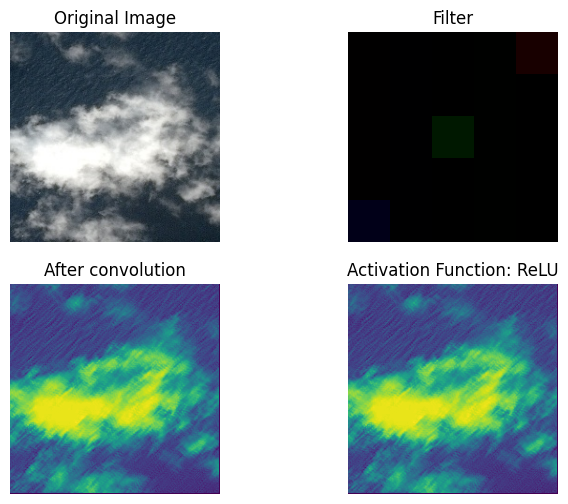

In [11]:
# libraries to import images
import os
import numpy as np
from PIL import Image

# get the current working directory and append the path to the image
path = os.getcwd()
path = path + "\\sample_image.jpg"
image = Image.open(path)
image = np.array(image)

# defining the kernel kernel depth must be same as depth of image (number of channels in image) and 
# our kernel has depth 3 same as channels mentioned in question
kernel = np.array([[[1, -1, -1, -1, -1],
  [1, -1, -1, -1, -1],
  [1, -1, 24, -1, -1],
  [1, -1, -1, -1, -1],
  [1, -1, -1, -1, -1]],

 [[1, -1, -1, -1, -1],
  [1, -1, -1, -1, -1],
  [1, -1, 24, -1, -1],
  [1, -1, -1, -1, -1],
  [1, -1, -1, -1, -1]],

 [[1, -1, -1, -1, -1],
  [1, -1, -1, -1, -1],
  [1, -1, 24, -1, -1],
  [1, -1, -1, -1, -1],
  [1, -1, -1, -1, -1]],

 ]).reshape(5,5,3)

# FIRST STEP ASKED IN 6th QUESTION
convImg = convolutionLayerFunction(image, kernel, 16, 5, 1, 0, 2, True)

1.6.2  Max pooling layer of size 2 × 2 with a stride of 2 along each dimension is performed below.

In [12]:
maxpoolImg = poolingLayerFunction(convImg, np.max, 2, 2)
maxpoolImg.shape

(110, 110, 16)

1.6.3 Based on the depth obtained after previous convolution we prepare our kernel for the next convolution layer and then again call the ConvolutionLayerFuntion. Number of filters passed for this layer is  32.

In [13]:
# preparing kernel 2 based on the maxpoolImg depth
import numpy as np

# Define your 3x3 kernel
kernel_3x3 = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]])

# Expand dimensions of the kernel to have a "depth" of 1 so it can be repeated
kernel_3x3_expanded = np.expand_dims(kernel_3x3, axis=2)

# Repeat the kernel across the depth to have 16 identical slices
kernel_depth_16 = np.repeat(kernel_3x3_expanded, repeats=16, axis=2)

# printing kernel depth for reference
print(kernel_depth_16.shape)


(3, 3, 16)


In [14]:
# once the kernels are ready we apply the convolution function for the second time
convTwoImg = convolutionLayerFunction(maxpoolImg, kernel_depth_16, 32, 3, 1, 0, 1)

C:\Users\joshi\AppData\Local\Temp\ipykernel_42708\783202164.py:5: RuntimeWarning: overflow encountered in exp
  activationImg = 1/(1+np.exp(convolvedImage))


1.6.4  Max pooling layer of size 2 × 2 with a stride of 2 along each dimension is performed below.

In [15]:
# max pooling layer applied
maxpoolTwoImg = poolingLayerFunction(convTwoImg, np.max, 2, 2)
maxpoolTwoImg.shape

(54, 54, 32)

1.6.5  Global Average Pooling (GAP) layer.

In [16]:
# global average pooling layer applied
gavpoolImg = poolingLayerFunction(maxpoolTwoImg, np.average, 2, 2, 1)
gavpoolImg.shape

(1, 1, 32)


(1, 1, 32)

1.6.6  MLP with one hidden layer (size same as input) that accepts as input the previous layer’s
output and maps it to 1000 output nodes. Used ReLU activation for the MLP (softmax in the
o/p layer).

In [17]:
# reshaping the output of GAP before feeding it to MLP layer
gavpoolImg = gavpoolImg.reshape((1,32))
finalOut = multiLayerPerceptron(gavpoolImg, 1, 32, 2, 1000)
finalOut.shape

(1, 1000)

We can verify that the final output vector shape is 1000. And the input was 224x224x3 image.

<b>END OF PROBLEM 1</b> <br> <br>